# Invasive Ductal Carcinoma Classifier
## Context
 - Noninvasive cancer means the abnormal cells are contained in the milk ducts of the breast and lack the ability to spread to surrounding tissue or elsewhere in the body. Invasive breast cancer means the cancer has grown beyond its original location into surrounding normal breast tissue and has the potential to spread to other parts of the body.
 - Ductal carcinoma in situ (DCIS) is a very early form of breast cancer that’s confined to the milk ducts, which is why it’s called “ductal.” “Carcinoma” is the name for any cancer that begins in cells that line the inner or outer surfaces of tissues, such as the breast ducts. “In situ” is a Latin term meaning “in its original place.” DCIS is the most common form of noninvasive breast cancer. DCIS is classified as low, intermediate, or high grade. Grades are based on what the cells look like under a microscope. The lower the grade, the more closely DCIS resembles normal breast cells. The higher the grade, the more different it is from normal cells. DCIS can sometimes involve the nipple, causing it to look red and scaly. This is a rare form of cancer known as Paget’s disease of the breast (named after the doctor who first described it)
- Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. To assign an aggressiveness grade to a whole mount sample, pathologists typically focus on the regions which contain the IDC. As a result, one of the common pre-processing steps for automatic aggressiveness grading is to delineate the exact regions of IDC inside of a whole mount slide.
## Dataset content 
- The data set is from https://www.kaggle.com/paultimothymooney/breast-histopathology-images
- The original dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). Each patch’s file name is of the format: uxXyYclassC.png — > example 10253idx5x1351y1101class0.png . Where u is the patient ID (10253idx5), X is the x-coordinate of where this patch was cropped from, Y is the y-coordinate of where this patch was cropped from, and C indicates the class where 0 is non-IDC and 1 is IDC.
## Inspiration 
- Breast cancer is the most common form of cancer in women, and invasive ductal carcinoma (IDC) is the most common form of breast cancer. Accurately identifying and categorizing breast cancer subtypes is an important clinical task, and automated methods can be used to save time, reduce error and save lives.

# Load Data from Kaggle

In [1]:
! pip install kaggle

     |████████████████████████████████| 59 kB 419 kB/s eta 0:00:011
     |████████████████████████████████| 118 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 570 kB/s eta 0:00:011
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73274 sha256=8b3a8c29e9e9ce91a4700a979d09ca7b755d80d22dd3e0b26e58bbf708765f0d
  Stored in directory: /home/user/.cache/pip/wheels/f3/67/7b/a6d668747974998471d29b230e7221dd01330ac34faebe4af4
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=4ed81074064a837f5a1a1adb040611ef609722db9ff201c94a922ee972a66e8f
  Stored in directory: /home/user/.cache/pip/wheels/91/4d/4f/e740a68c215791688c46c4d6251770a570e8dfea91af1acb5c
  Created wheel for slugify: filename=slugify-0.0.1-py3-none-any.whl size=1909 sha256=55c52ae0d5b65e7a2d0d883049475aed9dd8d579fc3ed0ea5a25c634288e995d
  Stored in directory: /home/user/.cache/pip/wheels/a2/49/ff/b5d3130b393f908f0faebf7b4069b259e97d23821

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100%|█████████████████████████████████████▉| 3.09G/3.10G [01:54<00:00, 33.6MB/s]
100%|██████████████████████████████████████| 3.10G/3.10G [01:54<00:00, 29.0MB/s]


In [4]:
! mkdir datasets
! mv breast-histopathology-images.zip datasets

In [5]:
from zipfile import ZipFile
file_name = 'datasets/breast-histopathology-images.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall('datasets/')
  print("Done")

Done


# Imports

In [7]:
from fastai.vision.all import *

# Set Dataset Path

In [8]:
path = Path('datasets/')
fnames=get_files(path, recurse=True)

# Load Data and preform transformations on Dataset
- This set of data only has resize transforms on all items in data set to size 224

In [61]:
data = ImageDataLoaders.from_folder(path, fnames, valid_pct=0.2, item_tfms=Resize(224))

## Class 0: Indicates no breast cancer
## Class 1: Indicates IDC(Breast Cancer)

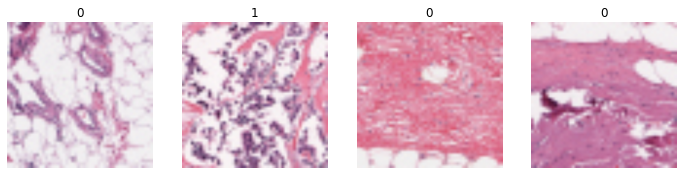

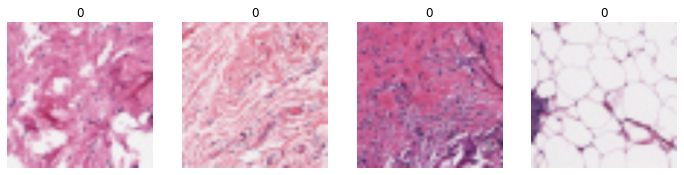

In [62]:
data.valid.show_batch(max_n=4, nrows=1)
data.train.show_batch(max_n=4, nrows=1)

## Lets try transfer learning first and see what we get
- Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.
- The original model is trained on ImageNet and then fine tuned using IDC dataset
# Initialize Convolutional Neural Network Model
- Architecture: ResNet34

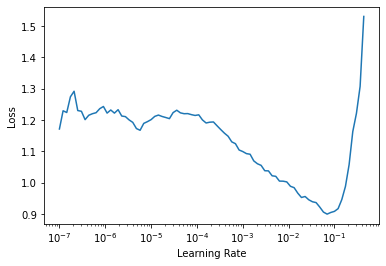

In [78]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find() #plot learning rate

### Lets try a learning rate of 3e-3

In [80]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.281342,0.253040,0.107740,04:52


epoch,train_loss,valid_loss,error_rate,time
0,0.229610,0.218440,0.090498,06:33
1,0.183496,0.193516,0.079418,06:34


## Model Accuracy

In [82]:
acc = 1 - learn.recorder.values[-1][2]
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.9205823019146919


### 92% Accuracy in 12 minutes.. Not bad lets see if I can imporve it

## Plot training and validation loss

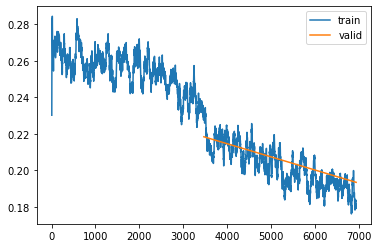

In [83]:
learn.recorder.plot_loss()

## Lets try to do it manually and see if we can get an improvment
# Initialize Convolutional Neural Network Model
- Architecture: ResNet34

In [84]:
learn = cnn_learner(data, resnet34, metrics=error_rate)

# Determine Learning Rate

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=9.120108734350652e-05)

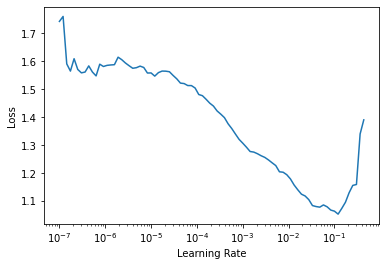

In [85]:
learn.lr_find()

In [86]:
learn.fit_one_cycle(3,3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.278046,0.270980,0.117811,04:53
1,0.221501,0.217615,0.090354,04:52
2,0.214191,0.209126,0.087291,04:55


# Inital model Accuracy 92%

## Find learning rate again

SuggestedLRs(lr_min=0.0002511886414140463, lr_steep=1.3182567499825382e-06)

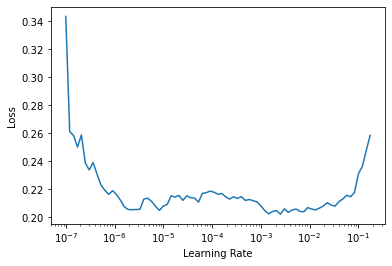

In [87]:
learn.lr_find()

# Unfreeze Model and Fine Tune the Model

In [91]:
learn.unfreeze()
learn.fit_one_cycle(6, 1.3e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.216582,0.219720,0.089471,06:33
1,0.207388,0.212391,0.086192,06:33
2,0.197399,0.212035,0.084715,06:33
3,0.208256,0.209329,0.084264,06:33
4,0.194811,0.208330,0.084336,06:33
5,0.201445,0.206049,0.084102,06:33


## Model Accuracy 

In [92]:
acc = 1 - learn.recorder.values[-1][2]
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.9158979505300522


### 91% Accuracy. A couple more epochs and it may imporve a tiny bit more lets see if I can imporve it with batch transformations and normalization

## Plot training and validation loss

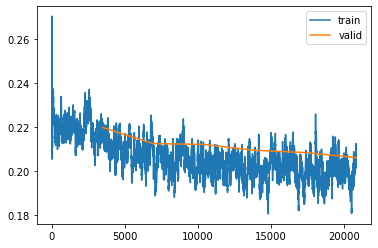

In [93]:
learn.recorder.plot_loss()

# Using Batch tranformations 
- This time around Im going to preform batch transformations on the data and see how the accuracy compares
- Normalize data
- batch size of 64
- loss function: Cross Entropy Loss Flat

In [95]:
batch_tfms = [*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)] 
data = ImageDataLoaders.from_folder(path, fnames, valid_pct=0.2, bs=64, item_tfms=Resize(460), batch_tfms=batch_tfms)

In [99]:
learn = cnn_learner(data, resnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [100]:
learn.fit_one_cycle(5, base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.289495,0.277595,0.882801,07:19
1,0.269760,0.241963,0.899827,07:19
2,0.246615,0.222749,0.907628,07:18
3,0.239585,0.217469,0.910403,07:18
4,0.227172,0.214787,0.912078,07:18


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.12010818865383e-07)

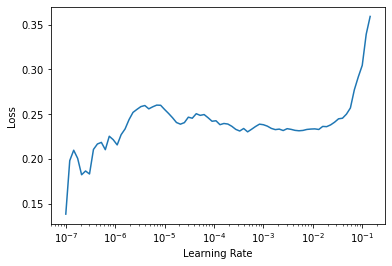

In [101]:
learn.lr_find()

In [103]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.247329,0.221474,0.908853,07:18


epoch,train_loss,valid_loss,accuracy,time
0,0.246605,0.240562,0.902079,08:49
1,0.245320,0.219029,0.911268,08:49
2,0.223072,0.197998,0.918474,08:50
3,0.192943,0.196106,0.919375,08:49


## Model Accuracy

### 92% Accuracy

## Plot training and validation loss

In [ ]:
learn.recorder.plot_loss()

# Lets try a deeper model 
- Architecture: ResNet50

In [9]:
from fastai.callback.fp16 import *
batch_tfms = [*aug_transforms(size=224,flip_vert=True, max_warp =0), Normalize.from_stats(*imagenet_stats)] 
data = ImageDataLoaders.from_folder(path, fnames, valid_pct=0.2, bs=64, item_tfms=Resize(460), batch_tfms=batch_tfms)
learn = cnn_learner(data, resnet50, metrics=[accuracy]).to_fp16()
learn.fine_tune(12, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/user/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.289380,0.261864,0.890648,16:16
1,0.254944,0.228536,0.904638,16:15
2,0.231051,0.212792,0.911899,16:16


epoch,train_loss,valid_loss,accuracy,time
0,0.217316,0.197365,0.918853,19:12
1,0.210034,0.192623,0.920718,19:06
2,0.219376,0.241483,0.924520,19:09
3,0.214095,0.734316,0.924997,19:12
4,0.188957,0.675688,0.931015,19:28
5,0.175575,0.168680,0.934771,19:16
6,0.174563,0.899500,0.937996,19:13
7,0.148392,0.143126,0.942887,19:13
8,0.144243,0.131802,0.946842,19:08
9,0.124936,0.124459,0.950013,19:07


## Model Accuracy

In [11]:
acc = learn.recorder.values[-1][2]
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.9532920718193054


### 95% Accuracy

## Plot training and validation loss

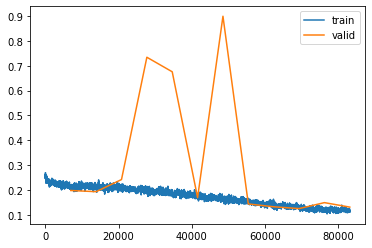

In [12]:
learn.recorder.plot_loss()

# TODO
- Test out a deeper achitecture (ResNet50)
- Test out different data transofrmations
- Test out larger image sizes and see if that increases accuracy
- Try progressive resizing: Gradually using larger and larger images
- try grayscale and see how the accuracy is affected